In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the true parameters of the PDE
a_true = 10
b_true = np.pi/2
c_true = 0.5

# Define the function f(x, t, theta_i)
def f_true(x, t, theta):
    return theta[0] * np.sin(theta[1] * x) * np.exp(-theta[2] * t)

# Generate data points
n_points = 1000
x = np.linspace(0, 2*np.pi, n_points)
t = np.linspace(0, 2*np.pi, n_points)
x, t = np.meshgrid(x, t)

# Define the true parameters
theta_true = [a_true, b_true, c_true]

# Generate true function values
z_true = f_true(x, t, theta_true)

# Generate N sampling points
N = 500
np.random.seed(42)
x_samples = np.random.uniform(0, 2*np.pi, N)
t_samples = np.random.uniform(0, 2*np.pi, N)

# Generate noisy data
z_samples = f_true(x_samples, t_samples, theta_true)

# Create a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(3)  # Output layer with 3 neurons for the 3 coefficients
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the sampled data
model.fit(np.column_stack((x_samples, t_samples)), np.tile(theta_true, (len(x_samples), 1)), epochs=100)

# Predict coefficients using the trained model
predicted_coefficients = model.predict(np.column_stack((x_samples, t_samples)))

# Generate function values using the predicted coefficients
z_predicted = f_true(x_samples, t_samples, predicted_coefficients[-1])

# Calculate and print the loss
loss = np.mean(np.square(z_predicted - z_samples))
print("Mean Squared Error Loss:", loss)


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 27.9509
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 15.3890
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 7.0708
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 4.1883
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 4.0689
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 3.7722
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 3.5883
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 3.3925
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 3.2014
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 3.0042
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 2.8089
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 2.6017
Epoch 13/100
16/16 [===============

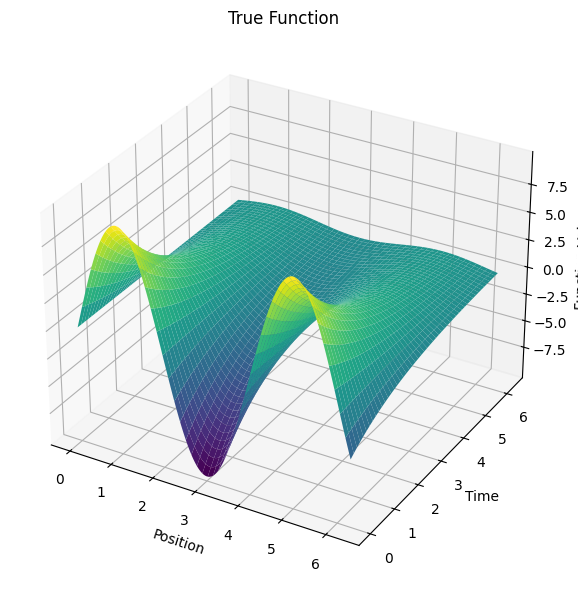

In [28]:
fig1 = plt.figure(figsize=(6, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x, t, z_true, cmap='viridis')
ax1.set_title('True Function')
ax1.set_xlabel('Position')
ax1.set_ylabel('Time')
ax1.set_zlabel('Function Value')
plt.tight_layout()
plt.show()

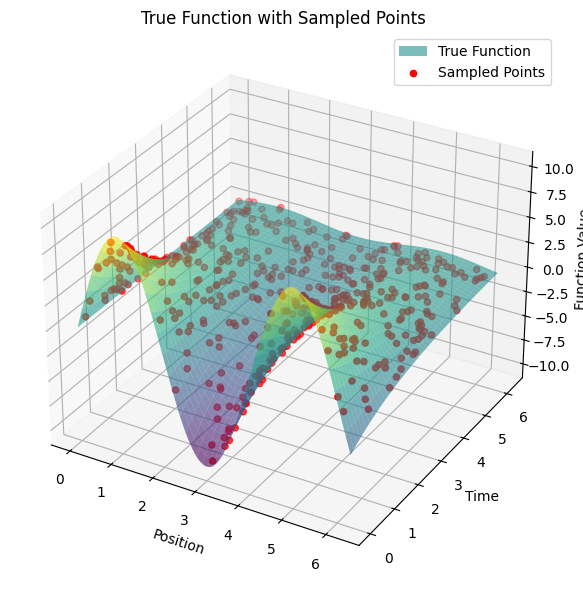

In [29]:
fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x, t, z_true, cmap='viridis', alpha=0.6, label='True Function')
ax2.scatter(x_samples, t_samples, z_samples, c='red', label='Sampled Points')
ax2.set_title('True Function with Sampled Points')
ax2.set_xlabel('Position')
ax2.set_ylabel('Time')
ax2.set_zlabel('Function Value')
plt.legend()
plt.tight_layout()
plt.show()

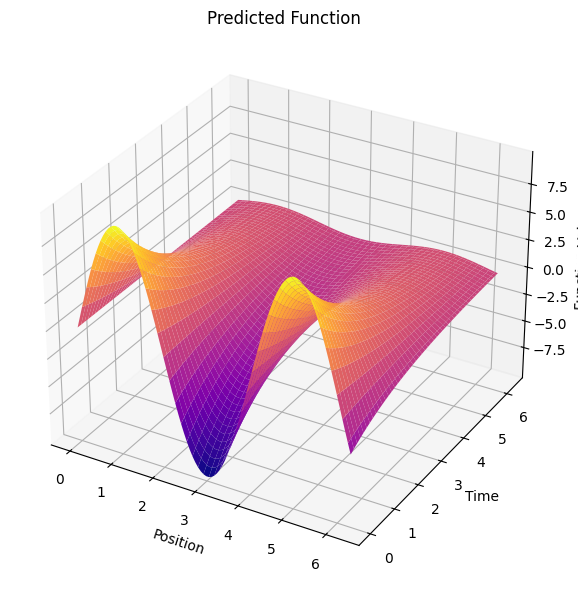

In [30]:
# Generate meshgrid of x and t values
x_values = np.linspace(0, 2*np.pi, 100)
t_values = np.linspace(0, 2*np.pi, 100)
x_mesh, t_mesh = np.meshgrid(x_values, t_values)

# Reshape x_mesh and t_mesh to fit the model input shape
x_test = np.column_stack((x_mesh.ravel(), t_mesh.ravel()))

# Predict function values using the trained model
z_predicted_all = f_true(x_test[:, 0], x_test[:, 1], predicted_coefficients[-1])

# Reshape z_predicted_all to match the shape of x_mesh and t_mesh
z_predicted_all = z_predicted_all.reshape(x_mesh.shape)

# Plot the predicted function over all x and t values
fig3 = plt.figure(figsize=(6, 6))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x_mesh, t_mesh, z_predicted_all, cmap='plasma')
ax3.set_title('Predicted Function')
ax3.set_xlabel('Position')
ax3.set_ylabel('Time')
ax3.set_zlabel('Function Value')
plt.tight_layout()
plt.show()

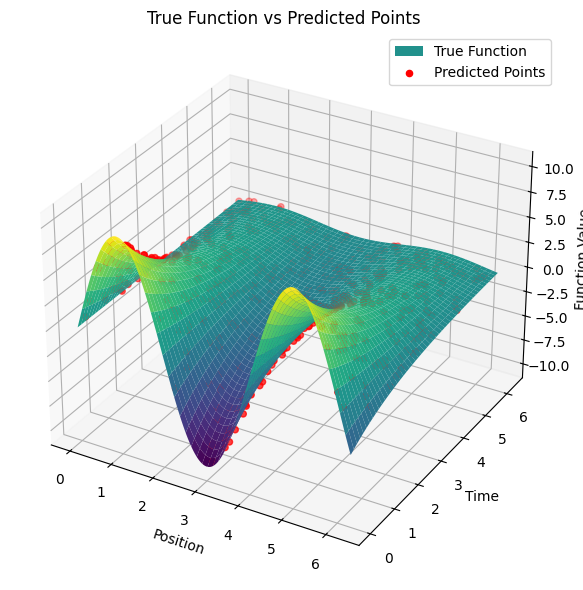

In [31]:
fig4 = plt.figure(figsize=(6, 6))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(x, t, z_true, cmap='viridis', label='True Function')
ax4.scatter(x_samples, t_samples, z_predicted, c='red', label='Predicted Points')
ax4.set_title('True Function vs Predicted Points')
ax4.set_xlabel('Position')
ax4.set_ylabel('Time')
ax4.set_zlabel('Function Value')
plt.legend()
plt.tight_layout()
plt.show()

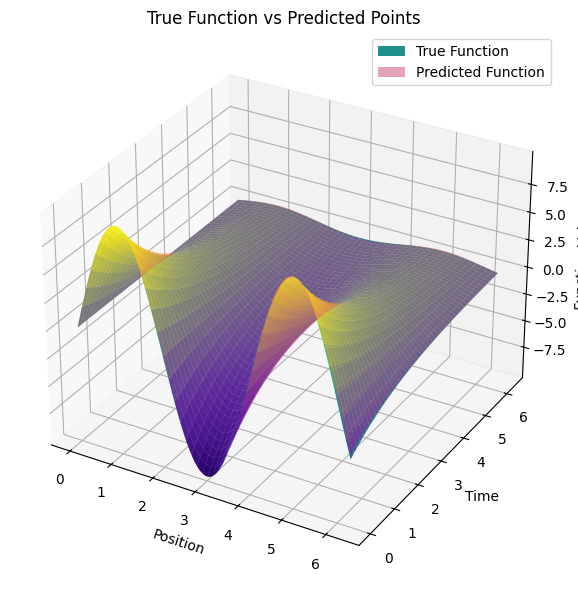

In [32]:
fig5 = plt.figure(figsize=(6, 6))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.plot_surface(x, t, z_true, cmap='viridis', label='True Function')
ax5.plot_surface(x_mesh, t_mesh, z_predicted_all, cmap='plasma', label = 'Predicted Function', alpha = 0.5)
ax5.set_title('True Function vs Predicted Points')
ax5.set_xlabel('Position')
ax5.set_ylabel('Time')
ax5.set_zlabel('Function Value')
plt.legend()
plt.tight_layout()
plt.show()